In [1]:
%matplotlib inline
# %matplotlib widget # 跟圖互動，可以用點選圖片中的某位置觸發程式
# %env KERAS_BACKEND=tensorflow
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
# from ipywidgets import interact, IntSlider, Button
# from ipywidgets import interact_manual

In [9]:
# generate data
def generate_data(len_of_data, dim = 2, draw = True, random_rate = 0.):
    if random_rate > 0:
        if random_rate > 1:
            random_rate = 1
        len_of_mistake_data = int(random_rate * len_of_data)
        if len_of_mistake_data == 0:
            len_of_mistake_data = 1
    else:
        len_of_mistake_data = 0
    
    xs = 2*(np.random.rand(1) + 1)*(np.random.rand(len_of_data, dim)-1) + np.random.randint(10, size=(dim,))-5

    means = np.mean(xs, axis=0)
    normal_vector = np.tan((np.random.rand(dim)-0.5)*np.pi) + np.random.rand(1)
    unit_vector = np.zeros(dim).astype(float)
    unit_vector[0] = 1.
    if np.dot(unit_vector, normal_vector)<=0:
        normal_vector *= -1
    if dim == 2 and draw:
        if round(normal_vector[1],2) == 0.:
            normal_vector[1]=0.1
    bias = np.dot(normal_vector, means)# + np.random.rand(1) - 0.5
    
    labels = np.sign(np.matmul(xs, normal_vector) - bias).astype(float)
    if len_of_mistake_data > 0:
        shuffle = np.arange(len_of_data)
        np.random.shuffle(shuffle)
        np.random.shuffle(shuffle)
        for idx in range(len_of_mistake_data):
            labels[shuffle[idx]] *= -1

    if dim == 2 and draw:
        print("data:")
        plt.scatter(xs[:, 0], xs[:, 1], c=labels) #, cmap="Set2")
        x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
        plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
        # plt.colorbar()
        plt.show()
    return (xs, labels)

In [50]:
def PLA(xs, labels, history_draw = True, epochs = 10000, modify_version_of_PLA = True):
    len_of_data, dim = xs.shape
    w = np.random.randint(5, size=(dim+1,)).astype(float)
    unit_vector = np.zeros(dim).astype(float)
    unit_vector[0] = 1.
    if np.dot(unit_vector, w[1:])<=0:
        w *= -1
    # w = np.zeros(dim+1).astype(float)
    best_len_of_mistakes = len_of_data
    best_w = w.copy()
    if dim != 2:
        history_draw = False

    epoch = 0
    for epoch in range(epochs):
        correct_indexs = []
        mistake_indexs = []
        for j in range(len_of_data):
            if np.sign(np.dot(xs[j], w[1:]) + w[0]) * labels[j] < 0:
                mistake_indexs.append(j)
            else:
                correct_indexs.append(j)
        len_of_mistakes = len(mistake_indexs)
        if len_of_mistakes == 0:
            best_len_of_mistakes = len_of_mistakes
            best_w = w.copy()
            # print(len_of_data, best_len_of_mistakes, len_of_mistakes)
            if epoch > 0:
                epoch -= 1
            break

        # print(len_of_data, best_len_of_mistakes, len_of_mistakes)

        if dim == 2 and history_draw and (epoch<10 or epoch%(int(epochs/10))==0 ):
            x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
            if round(w[2],8) == 0.:
                plt.plot(x, -1 * (x * w[1] + w[0])/0.000001, color='green', label='prev')
            else:
                plt.plot(x, -1 * (x * w[1] + w[0])/w[2], color='green', label='prev')
            for idx in range(len_of_mistakes):
                plt.scatter(xs[mistake_indexs[idx], 0], xs[mistake_indexs[idx], 1], color='r', s=[70])

        # print((best_len_of_mistakes > len_of_data * 0.5))
        # print((len_of_mistakes <= best_len_of_mistakes * 1.5),"\n\n")
        # if (len_of_mistakes <= best_len_of_mistakes * 1.5) or (best_len_of_mistakes > len_of_data * 0.5):
        if len_of_mistakes <= best_len_of_mistakes:
            best_len_of_mistakes = len_of_mistakes
            best_w = w.copy()
        idx = np.random.randint(len_of_mistakes)
        sidx = mistake_indexs[idx]
        w[1:] = w[1:] + labels[sidx] * xs[sidx]
        w[0] += labels[sidx]
        unit_vector = np.zeros(dim).astype(float)
        unit_vector[0] = 1.
        if np.dot(unit_vector, w[1:])<=0:
            w *= -1

        if dim == 2 and history_draw and (epoch<10 or epoch%(int(epochs/10))==0 ):
            print("epoch = ", epoch)
            print(w)
            plt.scatter(xs[:, 0], xs[:, 1], c=labels)
            x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
            # plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
            if round(w[2],8) == 0.:
                plt.plot(x, -1 * (x * w[1] + w[0])/0.000001, label='update')
            else:
                plt.plot(x, -1 * (x * w[1] + w[0])/w[2], label='update')
            plt.legend()
            plt.show()

    print("epoch = ", epoch, "Final")
    if dim == 2:
        plt.scatter(xs[:, 0], xs[:, 1], c=labels)
        x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
        # plt.plot(x, (-1 * x * normal_vector[0] + bias)/normal_vector[1])
        if round(best_w[2],8) == 0.:
            plt.plot(x, -1 * (x * best_w[1] + best_w[0])/0.000001)
        else:
            plt.plot(x, -1 * (x * best_w[1] + best_w[0])/best_w[2])
        plt.show()
    return best_w

data:


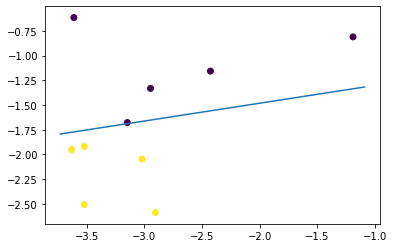

epoch =  0
[-3.          0.52155984  2.50687571]


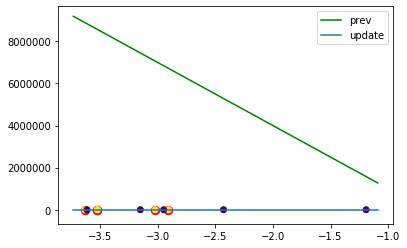

epoch =  1
[ 2.          2.49885481 -0.46030793]


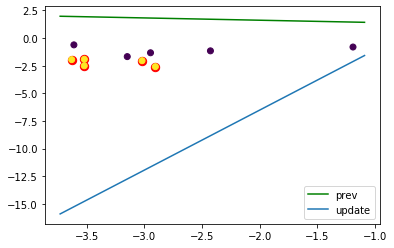

epoch =  2
[-3.          0.52155984  2.50687571]


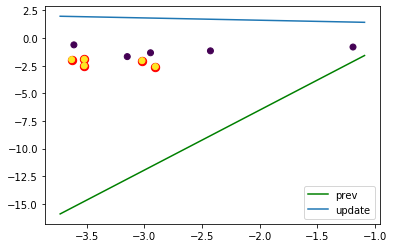

epoch =  3
[ 2.          2.49885481 -0.46030793]


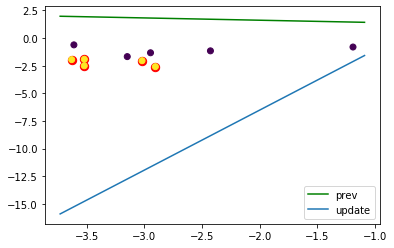

epoch =  4
[-3.          1.13167636  2.41113873]


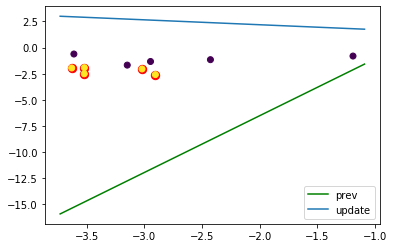

epoch =  5
[ 2.          2.38933888 -0.49139867]


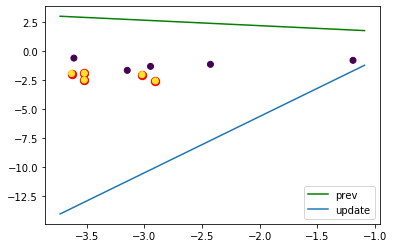

epoch =  6
[-3.          1.24119229  2.44222947]


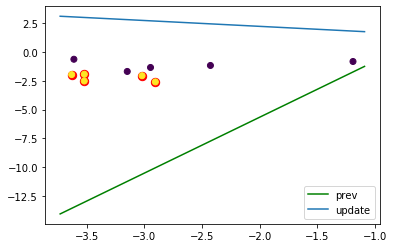

epoch =  7
[2.         1.66382521 0.14512697]


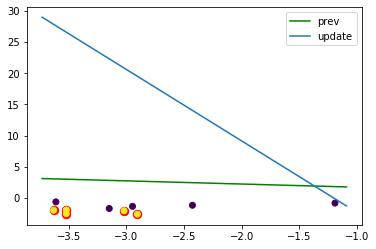

epoch =  8
[-3.          1.85773463  2.36174875]


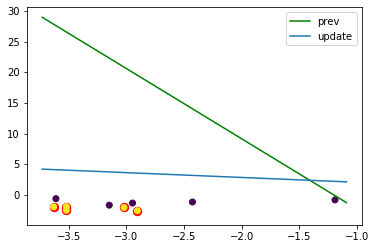

epoch =  9
[ 2.          1.77279654 -0.41091794]


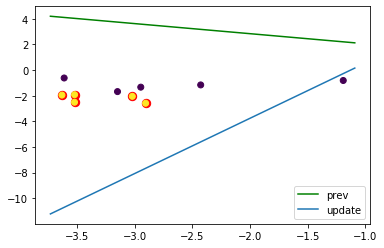

epoch =  100
[-3.          3.48501566 -3.76655396]


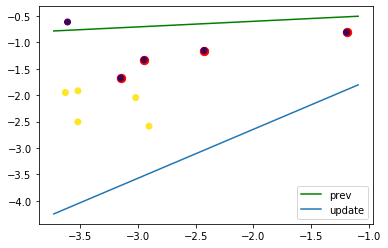

epoch =  144 Final


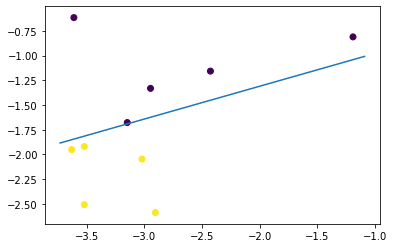

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False


In [51]:
xs, labels = generate_data(10, random_rate = 0)
w = PLA(xs, labels, epochs=1000)
len_of_data, dim = xs.shape
for idx in range(len_of_data):
    print(idx, np.sign(np.dot(xs[idx], w[1:]) + w[0]) != labels[idx])

In [46]:
xs_0, labels_0 = generate_data(10, dim=3)
w_0 = PLA(xs_0, labels_0)
len_of_data, dim = xs_0.shape
for idx in range(len_of_data):
    print(idx, (np.dot(xs_0[idx], w_0[1:]) + w_0[0]) * labels_0[idx] < 0)

epoch =  711 Final
0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False


In [50]:
%matplotlib widget
from matplotlib.widgets import Cursor, Button
from IPython.display import clear_output
# xs = np.array([[1.,0.], [0.,1.]])
fig, ax = plt.subplots()
xs, labels = generate_data(10, draw = False, random_rate = 0)
len_of_data, dim = xs.shape
w = np.array([2,-3,5])
correct_indexs = []
mistake_indexs = []
for j in range(len_of_data):
    if np.sign(np.dot(xs[j], w[1:]) + w[0])< 0:
        # print(j, np.sign(np.dot(xs[j], w[1:]) + w[0]), labels[j])
        mistake_indexs.append(j)
    else:
        correct_indexs.append(j)
# p, = plt.plot(x, y)

# print(np.sign(np.dot(xs[0], w[1:]) + w[0]))
# print(np.sign(np.dot(xs[1], w[1:]) + w[0]))

# plt.scatter(xs[:, 0], xs[:, 1])
labels1 = np.ones(len_of_data).astype(float)
for j in range(len_of_data):
    if j in mistake_indexs:
        # print(j, np.sign(np.dot(xs[j], w[1:]) + w[0]), labels[j])
        labels1[j] = -1
plt.scatter(xs[:, 0], xs[:, 1], c=labels1)


x = np.linspace(min(xs[:, 0])-0.1, max(xs[:, 0])+0.1, 2)
if round(w[2],8) == 0.:
    plt.plot(x, -1 * (x * w[1] + w[0])/0.1)
else:
    plt.plot(x, -1 * (x * w[1] + w[0])/w[2])

cursor = Cursor(ax,
                horizOn=True, # Controls the visibility of the horizontal line
                vertOn=True, # Controls the visibility of the vertical line
                color='green',
                linewidth=2.0
               )
def onclick(event):
    # clear_output()
    global xs
    x1, y1 = event.xdata, event.ydata
    xs = np.append(xs, [[x1, y1]], axis=0)
    # print(xs[len(xs)-1], np.sign(np.dot(xs[len(xs)-1], w[1:]) + w[0]))
    if np.sign(np.dot(xs[len(xs)-1], w[1:]) + w[0]) >= 0:
        plt.scatter(x1, y1, color='r')
    else:
        plt.scatter(x1, y1, color='g')
    # print(x1, y1)
fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

FigureCanvasNbAgg()